# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014


## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np

dataset = load_diabetes()

x = dataset.data

y = dataset.target

Mostre os formatos da variável de atributos e da variável de saídas.

In [2]:
x.shape

(442, 10)

In [3]:
y.shape

(442,)

## Redução de Dimensionalidade

Usando pandas para facilitar a analise 

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [4]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, Isomap

#Como os valores estão próximos não irei normalizar

pca = PCA(n_components=1)
pca = pca.fit_transform(x)

fICA = FastICA(n_components=1, random_state=0)
fICA = fICA.fit_transform(x)

isomap = Isomap(n_components=1)
isomap = isomap.fit_transform(x)

tsne = TSNE(n_components=1).fit_transform(x)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [5]:
pca.shape

(442, 1)

In [6]:
fICA.shape

(442, 1)

In [7]:
isomap.shape

(442, 1)

In [8]:
tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [9]:
# Para a regressão simples funcionar irei precisar de apenas 1 feature das 10,
# então irei usar a correlação do pandas para encontrar a feature com maior correlação

import pandas as pd

df = pd.DataFrame(x)
df['Saida'] = y

print(df.head())

df.corr()

          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

          7         8         9  Saida  
0 -0.002592  0.019908 -0.017646  151.0  
1 -0.039493 -0.068330 -0.092204   75.0  
2 -0.002592  0.002864 -0.025930  141.0  
3  0.034309  0.022692 -0.009362  206.0  
4 -0.002592 -0.031991 -0.046641  135.0  


,0,1,2,3,4,5,6,7,8,9,Saida
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [10]:
# Como a 3 feature tem a maior correlação ela sera usada no treinamento

x2 = x[:,2]
x2 =x2.reshape(-1,1)

x2.shape

(442, 1)

In [11]:
from sklearn.model_selection import train_test_split

x2_treinamento, x2_teste, y_treinamento, y_teste = train_test_split(x2,y,test_size =0.20)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x2_treinamento, y_treinamento)

previsao = regressor.predict(x2_teste)

print(previsao[:10])
print(y_teste[:10])

[206.58533071 166.17578051 203.62853436 133.6510206  135.62221817
 242.06688698 136.60781696 120.83823639 144.49260724 116.89584125]
[268.  96. 303.  47.  77. 243.  80. 120. 100.  93.]


Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y_teste, previsao)
print(mse)

r_square = regressor.score(x2_treinamento, y_treinamento)
print(r_square)

r_square = r2_score(y_teste, previsao)
print(r_square)

#duvida: ambos são R^2 mas os resultados são diferentes

3675.5631748351957
0.3264585295696615
0.4032077340696406


Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

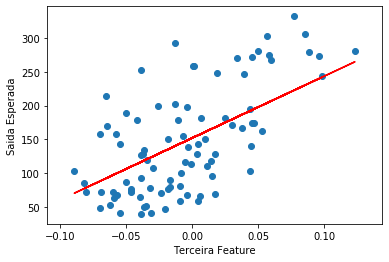

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.scatter(x2_teste, y_teste)
plt.plot(x2_teste, regressor.predict(x2_teste), color = 'red')
plt.xlabel('Terceira Feature')
plt.ylabel('Saida Esperada')
plt.show()

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

In [15]:
# celula dedicada a criar funções que serão reaproveitadas nos próximos exercicios

# Função Separação
def separacao(x,y):
    x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x,y,test_size =0.20)
    separado = {'x_treinamento': x_treinamento, 'x_teste':x_teste, 
                'y_treinamento':y_treinamento, 'y_teste': y_teste}
    return separado

# Função de treinamento.
def treinamento(x_treinamento, y_treinamento):
    regressor = LinearRegression()
    regressor.fit(x_treinamento, y_treinamento)
    return regressor 

# Função de predição
def predicao(x_teste, regressor):
    x_teste = np.asarray(x_teste)
    x_teste.reshape(-1,1)
    predicao = regressor.predict(x_teste)
    return predicao

# Função com metricas
def metricas(y_teste, predicao):
    mse=mean_squared_error(y_teste, predicao)
    r_square = r2_score(y_teste, predicao) 
    metricas = { 'mse':mse, 'r2': r_square}
    return metricas

# Função que adiciona os valores as suas respectivas listas
def adiciona_a_lista(lista, valor):
    lista.append(valor)
    print(lista)
    
# Função que calcula os valores min, mean, max e des_padrao
def valores(lista):
    mi = np.min(lista)
    ma = np.max(lista)
    me = np.mean(lista)
    l = np.var(lista)
    l = np.sqrt(l)
    print('O valor mínimo é {}'.format(mi))
    print('O valor máximo é {}'.format(ma))
    print('O valor médio é {}'.format(me))
    print('O valor do desvio padrão é {}'.format(l))
    
# Função que junta todas as outras funções em uma só

##OBS: Código não funcionou :(

def super_func(x,y):
    test_split = separacao(x,y)
    regressor = treinamento(test_split[0],test_split[2])
    predicao = predicao(test_split[1], regressor)
    metricas = metricas(test_split[3], predicao)
    adiciona_a_lista(l_mse, metricas['mse'])
    adiciona_a_lista(l_r, metricas['r2'])
    lista=[l_mse,l_r]
    return lista


#### PCA

In [16]:
def pca(x):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    pca = PCA(n_components=1)
    pca = pca.fit_transform(x)
    return pca

#### ICA

In [17]:
### Escreva seu código aqui ###

#### Isomap

In [18]:
### Escreva seu código aqui ###

#### TSNE

In [19]:
### Escreva seu código aqui ###

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

In [20]:
# Serão usados os dados do PCA com n=1 para criar o espaço de analise do regressores

pca = pca(x)
test_split = separacao(pca,y)

#### Least Squares

o mse é 7812.65270560821, o r^2 é -0.2685214453744045


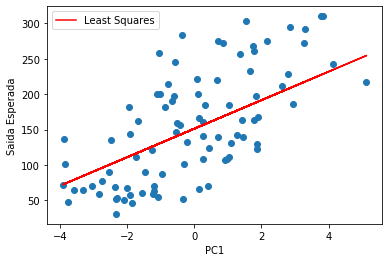

In [22]:
reg = LinearRegression().fit(test_split['x_treinamento'], test_split['y_treinamento'])

pred_reg = reg.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_reg)
r_square = r2_score(y_teste, pred_reg)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_reg, color = 'red', label='Least Squares')
plt.xlabel('PC1')
plt.legend()
plt.ylabel('Saida Esperada')
plt.show()

#### Ridge

o mse é 7810.327281255732, o r^2 é -0.26814387187000444


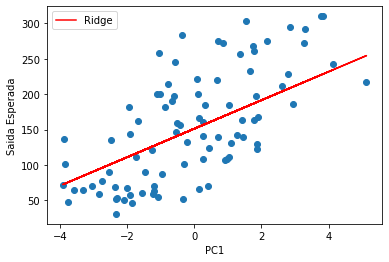

In [23]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(test_split['x_treinamento'], test_split['y_treinamento'])

pred_ridge = clf.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_ridge)
r_square = r2_score(y_teste, pred_ridge)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_ridge, color = 'red',label='Ridge')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()

#### Lasso

o mse é 7808.576576482454, o r^2 é -0.2678596141878695


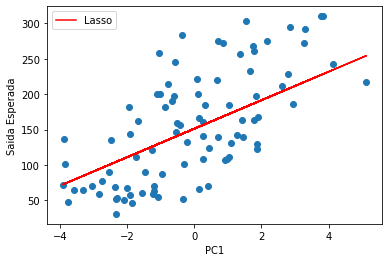

In [24]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(test_split['x_treinamento'],test_split['y_treinamento'])

pred_lasso = lasso.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_lasso)
r_square = r2_score(y_teste, pred_lasso)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_lasso, color = 'red',label='Lasso')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()

#### Lasso LARS

o mse é 7662.914992778082, o r^2 é -0.2442088966071998


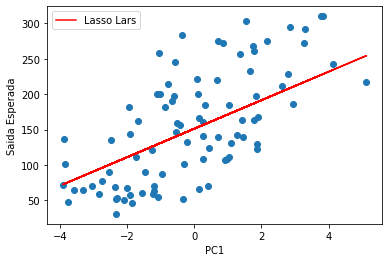

In [25]:
from sklearn.linear_model import LassoLars

lasso_lars = LassoLars(alpha=0.1)
lasso_lars.fit(test_split['x_treinamento'],test_split['y_treinamento'])

pred_lasso_lars = lasso_lars.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_lasso_lars)
r_square = r2_score(y_teste, pred_lasso_lars)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_lasso, color = 'red',label='Lasso Lars')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()


#### Bayesian Ridge

o mse é 7788.089906091619, o r^2 é -0.26453324327208105


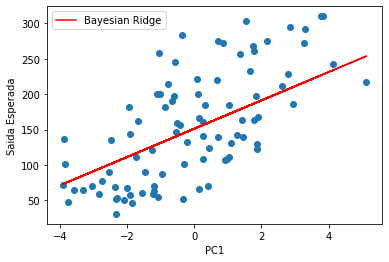

In [26]:
from sklearn.linear_model import BayesianRidge
bay_ridge = BayesianRidge()
bay_ridge.fit(test_split['x_treinamento'],test_split['y_treinamento'])

pred_bay_ridge = bay_ridge.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_bay_ridge)
r_square = r2_score(y_teste, pred_bay_ridge)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_bay_ridge, color = 'red',label='Bayesian Ridge')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()


#### RANSAC

o mse é 8125.214531183505, o r^2 é -0.31927134988033723


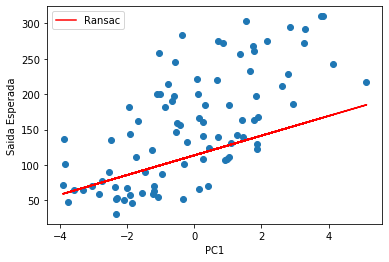

In [27]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(test_split['x_treinamento'],test_split['y_treinamento'])

pred_ransac =ransac.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_ransac)
r_square = r2_score(y_teste, pred_ransac)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_ransac, color = 'red',label='Ransac')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()


#### Theil-Sen

o mse é 8198.968089002836, o r^2 é -0.3312465359396539


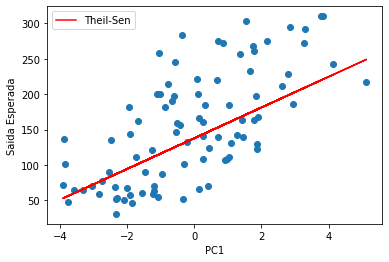

In [28]:
from sklearn.linear_model import TheilSenRegressor
Theil_Sen = TheilSenRegressor()
Theil_Sen.fit(test_split['x_treinamento'],test_split['y_treinamento'])

pred_Theil_Sen =Theil_Sen.predict(test_split['x_teste'])
mse=mean_squared_error(y_teste,pred_Theil_Sen)
r_square = r2_score(y_teste, pred_Theil_Sen)

print ('o mse é {}, o r^2 é {}'.format(mse, r_square))

plt.scatter(test_split['x_teste'], test_split['y_teste'])
plt.plot(test_split['x_teste'], pred_Theil_Sen, color = 'red',label='Theil-Sen')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.show()

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

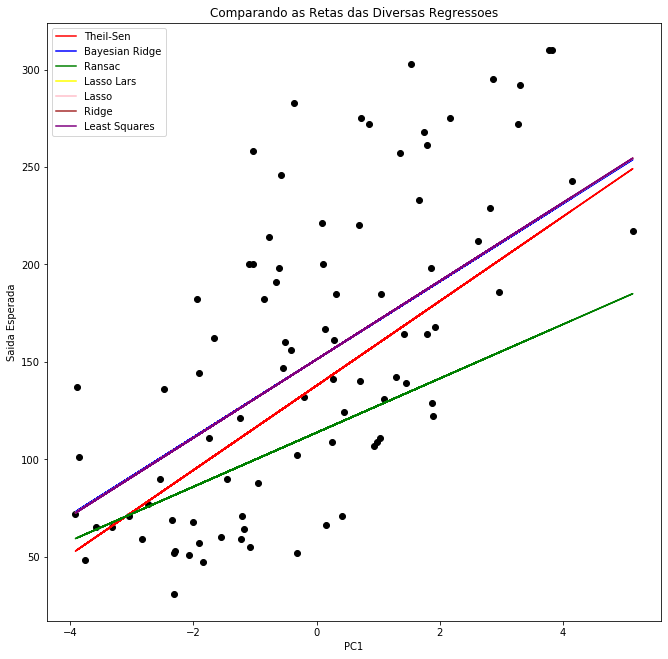

In [29]:
plt.figure(figsize =(11,11))

plt.scatter(test_split['x_teste'], test_split['y_teste'], color ='black')

plt.plot(test_split['x_teste'], pred_Theil_Sen, color = 'red',label='Theil-Sen')
plt.plot(test_split['x_teste'], pred_bay_ridge, color = 'blue',label='Bayesian Ridge')
plt.plot(test_split['x_teste'], pred_ransac, color = 'green',label='Ransac')
plt.plot(test_split['x_teste'], pred_lasso, color = 'yellow',label='Lasso Lars')
plt.plot(test_split['x_teste'], pred_lasso, color = 'pink',label='Lasso')
plt.plot(test_split['x_teste'], pred_ridge, color = 'brown',label='Ridge')
plt.plot(test_split['x_teste'], pred_reg, color = 'purple', label='Least Squares')

plt.legend()
plt.xlabel('PC1')
plt.ylabel('Saida Esperada')
plt.title('Comparando as Retas das Diversas Regressoes')
plt.show()
